In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [18]:
N = 50 # no. of FV cells
x = np.linspace(0.0, 1.0, N)
u0 = np.sin(x * 2 * np.pi) # continuous sinusoidal initial condition

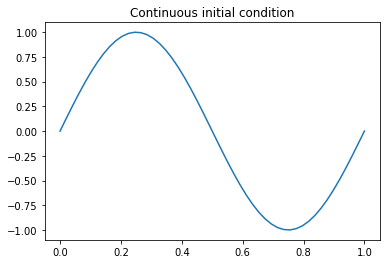

In [19]:
plt.plot(x, u0)
plt.title('Continuous initial condition')
plt.show()

In [20]:
xx = [np.linspace(x[i], x[i+1], 3) for i in np.arange(0, len(x) - 1)]
uu = [np.linspace(u0[i], u0[i], 3) for i in np.arange(0, len(u0))]

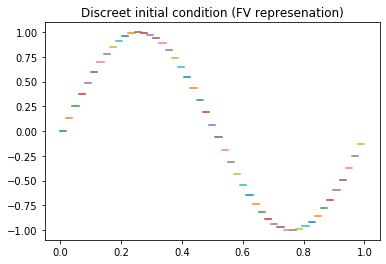

In [21]:
for i in np.arange(0, len(xx)):
    plt.plot(xx[i], uu[i])
plt.title('Discreet initial condition (FV represenation)')
plt.show()

In [22]:
dx = 1.0 / N
aP = np.ones(N-2)
# B.C.
u0[0] = 0.
u0[-1] = 0. # u(0, t) = u(l, t) = 0

In [23]:
u1 = u0.copy()
time = 0.4
dt = 0.01
for t in np.arange(0, time, dt):
    # interface fluxes for interior FV cells (Central Flux Scheme)
    Fw = np.square((u1[:-2] + u1[1:-1]) / 2.0) / 2.0
    Fe = np.square((u1[1:-1] + u1[2:]) / 2.0) / 2.0
    u_tdma = np.diag(aP, k=0)
    # source for interior FV cells
    S = u1[1:-1] + (Fw - Fe) * (dt/dx)
    # solve
    u_solution = np.linalg.solve(u_tdma, S)
    # update
    u1[1:-1] = u_solution

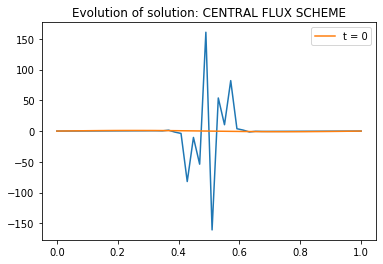

In [24]:
plt.plot(x, u1)
plt.plot(x, u0, label = 't = 0')
plt.title('Evolution of solution: CENTRAL FLUX SCHEME')
plt.legend()
plt.show()

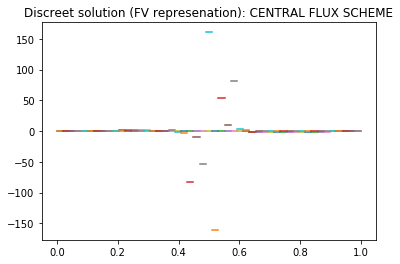

In [25]:
xx = [np.linspace(x[i], x[i+1], 3) for i in np.arange(0, len(x) - 1)]
uu0 = [np.linspace(u0[i], u0[i], 3) for i in np.arange(0, len(u0))]
uu1 = [np.linspace(u1[i], u1[i], 3) for i in np.arange(0, len(u1))]
for i in np.arange(0, len(xx)):
    plt.plot(xx[i], uu0[i])
    plt.plot(xx[i], uu1[i])
plt.title('Discreet solution (FV represenation): CENTRAL FLUX SCHEME')
plt.show()

In [26]:
uP = u0.copy()
time = 0.5
dt = 0.01
F = np.zeros(N-1) # Flux vector for interior FV cells
for t in np.arange(0, time, dt):
    # Fluxes at each FV cell centers
    FP = np.square(uP) / 2.0
    # shock/wave speed
    u_wave = np.zeros(len(uP))
    u_wave[:-1] = (FP[1:] - FP[:-1]) / (uP[1:] - uP[:-1])
    u_wave[-1] = (FP[-1]) / (uP[-1])
    # interface fluxes for interior FV cells (Upwind Scheme)
    for i in range(0, N):
        if u_wave[i] > 0.:
            F[i] = FP[i]
        elif u_wave[i] < 0.:
            F[i-1] = FP[i]
    
    u_tdma = np.diag(aP, k=0)
    # source for interior FV cells
    S = uP[1:-1] + (F[:-1] - F[1:]) * (dt/dx)
    # solve
    u_solution = np.linalg.solve(u_tdma, S)
    # update
    uP[1:-1] = u_solution

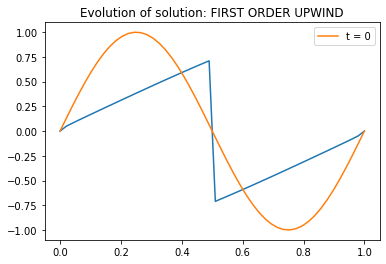

In [27]:
plt.plot(x, uP)
plt.plot(x, u0, label = 't = 0')
plt.title('Evolution of solution: FIRST ORDER UPWIND')
plt.legend()
plt.show()

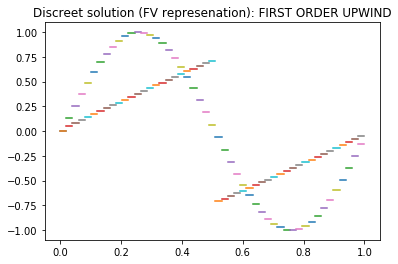

In [28]:
xx = [np.linspace(x[i], x[i+1], 3) for i in np.arange(0, len(x) - 1)]
uu0 = [np.linspace(u0[i], u0[i], 3) for i in np.arange(0, len(u0))]
uu1 = [np.linspace(uP[i], uP[i], 3) for i in np.arange(0, len(uP))]
for i in np.arange(0, len(xx)):
    plt.plot(xx[i], uu0[i])
    plt.plot(xx[i], uu1[i])
plt.title('Discreet solution (FV represenation): FIRST ORDER UPWIND')
plt.show()

In [13]:
r = np.linspace(0, 4, 400)

In [14]:
A = []
beta = 1.5
for i in r:
    a = [0, min(i*beta, 1), min(i, beta)]
    A.append(a)

In [15]:
Phi = []
for i in range(0, r.size):
    Phi.append(np.amax(A[i]))

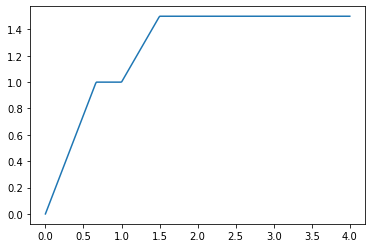

In [16]:
plt.plot(r, np.array(Phi))